### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. Investigate the dataset for missing or problematic data.

In [12]:
#Look for null values, car is missing 12,576 of the 12,684 records, consider dropping
data.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [5]:
#Count the number of each value and determine need for data cleansing

#data['destination'].value_counts() #25, 25, 50 split
#data['passanger'].value_counts() # Alone dominant, good split
#data['weather'].value_counts() #80% sunny, fair split
#data['temperature'].value_counts() # 80 dominant ~64%, good split
#data['time'].value_counts() #good division
#data['coupon'].value_counts() # good split
#data['expiration'].value_counts() # 56% 1d
#data['gender'].value_counts() #even distribution, slightly female dominante 52%
#data['age'].value_counts() # even distribution, may change 50plus to 50 amd below 21 to 20 for correlations
#data['maritalStatus'].value_counts() #  may consider adding divorced and widowed as other
#data['has_children'].value_counts() # 59% does not have children
#data['education'].value_counts() # good distribution
#data['occupation'].value_counts() # 25 types of values here, may consider adding a category column to reduce, healthcare, not working, blue collar
#data['income'].value_counts() # may consider adding a column as the salary base to correlate
#data['Bar'].value_counts() # good distribution, consider numericals for correlations
#data['CoffeeHouse'].value_counts() ## good distribution
#data['CarryAway'].value_counts() ## good distribution
#data['RestaurantLessThan20'].value_counts() #  good distribution
#data['Restaurant20To50'].value_counts() #  good distribution
#data['toCoupon_GEQ5min'].value_counts() # consider dropping, all within 5 minutes by design
#data['toCoupon_GEQ25min'].value_counts() # 90% no
#data['toCoupon_GEQ15min'].value_counts() # ~57 within 15
#data['direction_same'].value_counts() # opposite direction dominate at 79%. Duplicative information with direction_opp, but consider leaving for labeling
#data['direction_opp'].value_counts() # 
#data['Y'].value_counts() #good split, yes dominate ~58%, change to redeemed for labeling


In [6]:
#Look for duplicated data
data.duplicated().sum()

74

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#Review duplicates data
data[data.duplicated()]

#decided not to drop these duplicate as there is no date stamp in this dataset, so a driver could redeem multiple times  #data = data.drop_duplicates()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Associates degree,Unemployed,Less than $12500,NaN,less1,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,0,Graduate degree (Masters or Doctorate),Management,$25000 - $37499,NaN,4~8,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,0,Bachelors degree,Education&Training&Library,$50000 - $62499,NaN,1~3,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,0,Some college - no degree,Protective Service,$25000 - $37499,NaN,1~3,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Bachelors degree,Life Physical Social Science,$37500 - $49999,NaN,less1,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,1,Graduate degree (Masters or Doctorate),Management,$87500 - $99999,NaN,less1,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [49]:
#drop data from car column as data is all homogeneous
del data['car']

In [50]:
#drop data from Coupon within 5 minutes as data is all homogeneous
del data['toCoupon_GEQ5min']

4. What proportion of the total observations chose to accept the coupon? 



In [92]:
#coupons accepted as percent of total
len(data.query('Y == 1'))/len(data)

0.5684326710816777

5. Use a bar plot to visualize the `coupon` column.

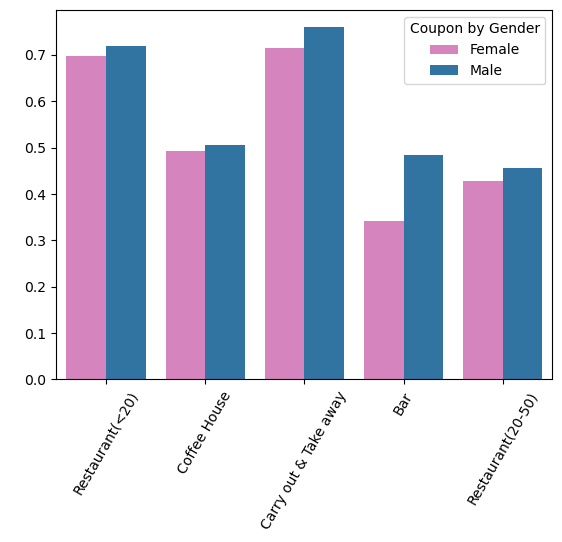

In [89]:
p = sns.barplot(data, x='coupon', y='Y', hue = 'gender', errorbar=None, palette = ['tab:pink', 'tab:blue'])
p.set(xlabel='Type of Coupon', ylabel=' ')
p.set_ylabel(" ", fontsize=6)
p.set_xlabel("", fontsize=1.5)
plt.legend(title='Coupon by Gender')
plt.xticks(rotation = 60)
plt.show()

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Total Records by Temperature')

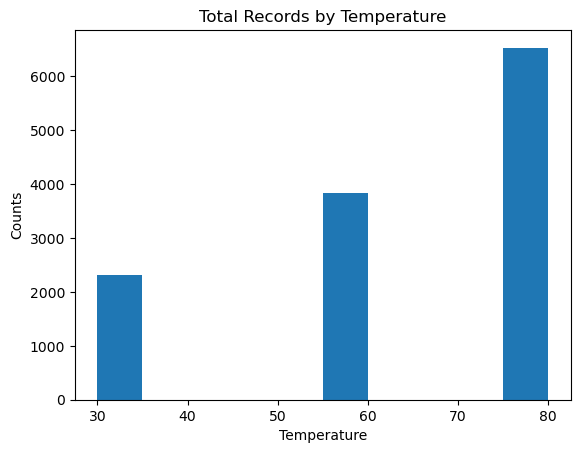

In [10]:
plt.hist(data['temperature'])
plt.xlabel('Temperature')
plt.ylabel('Counts')
plt.title('Total Records by Temperature')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [53]:
DataBarCoupons = data.query('coupon == "Bar"')
len(DataBarCoupons)

2017

2. What proportion of bar coupons were accepted?


In [17]:
len(DataBarCoupons.query('Y==1'))/len(DataBarCoupons)

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [18]:
len(DataBarCoupons.query('Y==1 & Bar == [ "never", "1~3", "less1"]'))/len(DataBarCoupons)

0.330193356470005

In [19]:
len(DataBarCoupons.query('Y==1 & Bar == ["4~8", "gt8"]'))/len(DataBarCoupons)

0.07585523054040655

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [21]:
len(DataBarCoupons.query('Y==1 & Bar == ["1-3","4~8", "gt8"] & age == ["26", "31", "50plus", "36", "41", "46"]'))/len(DataBarCoupons)

0.05205751115518096

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [22]:
len(DataBarCoupons.query('Y == 1 & Bar == [ "1~3", "4~8", "gt8"] & passanger == ["Friend(s)", "Partner"] & occupation != "Farming Fishing & Forestry"') )/len(DataBarCoupons)

0.06941001487357462

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [41]:
len(DataBarCoupons.query('Y == 1 & Bar == [ "1~3", "4~8", "gt8"] & passanger == ["Friend(s)", "Partner"] & maritalStatus != "Widowed"') )/len(DataBarCoupons)

#Look at alternatives
#len(DataBarCoupons.query('Y == 1 & Bar != [ "1~3", "4~8", "gt8"] & passanger == ["Friend(s)", "Partner"] & maritalStatus != "Widowed"') )/len(DataBarCoupons)- 7.6%
#len(DataBarCoupons.query('Y == 1 & Bar == [ "1~3", "4~8", "gt8"] & passanger != ["Friend(s)", "Partner"] & maritalStatus != "Widowed"') )/len(DataBarCoupons)-13.4%

#Drivers who have never been to a bar redeem more. People that are alone redeem coupons more often

0.06941001487357462

In [35]:
len(DataBarCoupons.query('Y == 1 & Bar == [ "1~3", "4~8", "gt8"] & age == ["26", "21", "below21"]') )/len(DataBarCoupons)

#Look at alternatives
#len(DataBarCoupons.query('Y == 1 & Bar == [ "1~3", "4~8", "gt8"] & age != ["26", "21", "below21"]') )/len(DataBarCoupons) - 7.9%

#The younger that the guest is, the more that they redeem coupons

0.12345066931085771

In [33]:
len(DataBarCoupons.query('income == ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"] & RestaurantLessThan20 == ["4~8", "gt8"]') )/len(DataBarCoupons) 

#Look at alternatives
#len(DataBarCoupons.query('income != ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"] & RestaurantLessThan20 == ["4~8", "gt8"]') )/len(DataBarCoupons)- 20%
#len(DataBarCoupons.query('income == ["$25000 - $37499", "$12500 - $24999", "$37500 - $49999", "Less than $12500"] & RestaurantLessThan20 != ["4~8", "gt8"]') )/len(DataBarCoupons)- 34%


0.17055032226078334

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [42]:
#DataBarCoupons.query('Y == 1').describe()
Hypothesis_BarCoupons = 'People do not redeem coupons often with family and partners in the car.Additonally the younger that they are the more they redeem bar coupons '

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [43]:
#Add new integer of mid range employment numbers based columns to sort values and add to correlation matrix


def Income_As_Integer(income):
    if income == 'Less than $12500':
        return 6250
    elif income == '$12500 - $24999':
        return 24999
    elif income == '$25000 - $37499':
        return 31250
    elif income == '$37500 - $49999':
        return 43750
    elif income == '$50000 - $62499':
        return 56250
    elif income == '$62500 - $74999':
        return 68750    
    elif income == '$75000 - $87499':
        return 81250
    elif income == '$87500 - $99999':
        return 93750
    elif income == '$100000 or More':
        return 150000
    else:
        return 0
        
data['Middle_Range_Income'] = data['income'].apply(Income_As_Integer)


In [45]:
#Add new integer to make age a value and add to correlation matrix


def Age_As_Integer(age):
    if age == '21':
        return 21
    elif age == '26':
        return 26
    elif age == '31':
        return 31
    elif age == '36':
        return 36
    elif age == '41':
        return 41
    elif age == '46':
        return 46  
    elif age == '50plus':
        return 50
    elif age == 'below21':
        return 18
    else:
        return 0
        
data['Age_Integer'] = data['age'].apply(Age_As_Integer)

In [47]:
#Create age as a decade

def Age_As_Decade(age):
    if age == '21':
        return 'Twenties'
    elif age == '26':
        return 'Twenties'
    elif age == '31':
        return 'Thirties'
    elif age == '36':
        return 'Thirties'
    elif age == '41':
        return 'Forties'
    elif age == '46':
        return 'Forties'
    elif age == '50plus':
        return 'Fifties Plus'
    elif age == 'below21':
        return 'Younger than 21'
    else:
        return 'Unknown'
        
data['Age_Decade'] = data['age'].apply(Age_As_Decade)

In [102]:
#Create expiration as total hours

def Convert_Expiration_Hours(expiration):
    if expiration == '2h':
        return 2
    elif expiration == '1d':
        return 24
    else:
        return 0
        
data['Expiration_Hours'] = data['expiration'].apply(Convert_Expiration_Hours)

In [103]:
data.describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Middle_Range_Income,Age_Integer,Expiration_Hours
count,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,0.561495,0.119126,0.214759,0.785241,0.568433,59884.848549,32.210265,14.299117
std,19.154486,0.492593,0.496224,0.323950,0.410671,0.410671,0.495314,42538.314768,10.298824,10.923447
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6250.000000,18.000000,2.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31250.000000,21.000000,2.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,43750.000000,31.000000,24.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,81250.000000,41.000000,24.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,150000.000000,50.000000,24.000000


In [104]:
data.query('Y==1').describe()

,temperature,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Middle_Range_Income,Age_Integer,Expiration_Hours
count,7210.000000,7210.000000,7210.000000,7210.000000,7210.000000,7210.000000,7210.0,7210.000000,7210.000000,7210.000000
mean,64.323856,0.394591,0.526214,0.089875,0.219972,0.780028,1.0,59238.758391,31.693343,15.535645
std,18.959363,0.488797,0.499347,0.286023,0.414256,0.414256,0.0,42847.963002,10.197366,10.704504
min,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,6250.000000,18.000000,2.000000
25%,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,31250.000000,21.000000,2.000000
50%,80.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.0,43750.000000,31.000000,24.000000
75%,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.0,81250.000000,41.000000,24.000000
max,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,150000.000000,50.000000,24.000000


                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000     -0.019716          -0.155332   
has_children           -0.019716      1.000000           0.078211   
toCoupon_GEQ15min      -0.155332      0.078211           1.000000   
toCoupon_GEQ25min      -0.216254     -0.013722           0.324984   
direction_same          0.097085     -0.031620          -0.303533   
direction_opp          -0.097085      0.031620           0.303533   
Y                       0.061240     -0.045557          -0.081602   
Middle_Range_Income    -0.027347      0.060837           0.014541   
Age_Integer            -0.019601      0.444193           0.036511   

                     toCoupon_GEQ25min  direction_same  direction_opp  \
temperature                  -0.216254        0.097085      -0.097085   
has_children                 -0.013722       -0.031620       0.031620   
toCoupon_GEQ15min             0.324984       -0.303533       0.303533   
toCoupon_GEQ25min

Text(0.5, 1.0, 'Correlation Heatmap All')

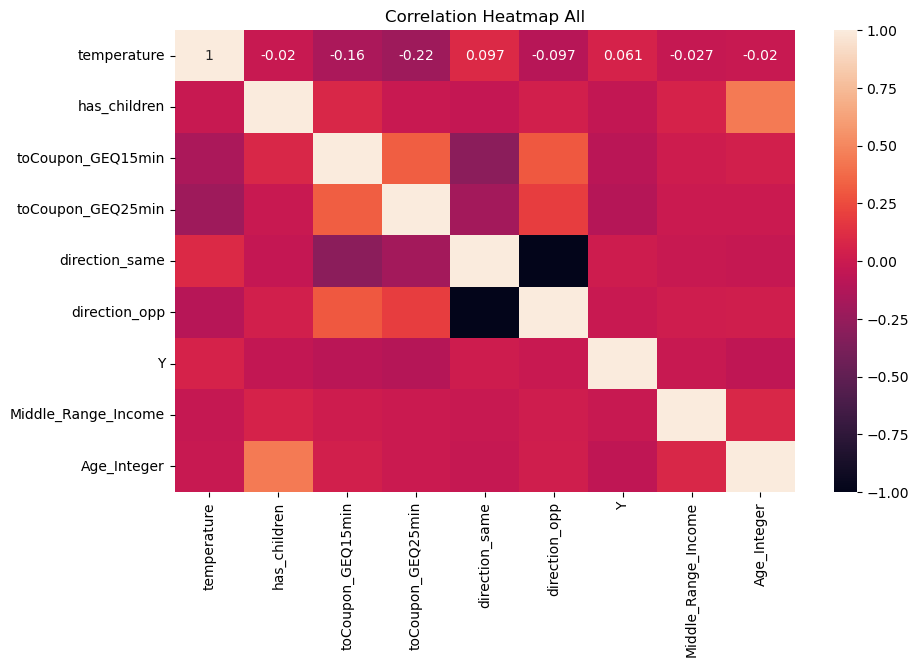

In [51]:
#Explore a correlation of numeric values for all records
print(data.corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(data.corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap All')

                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000     -0.155457          -0.173643   
has_children           -0.155457      1.000000           0.020154   
toCoupon_GEQ15min      -0.173643      0.020154           1.000000   
toCoupon_GEQ25min      -0.288439      0.015796           0.420806   
direction_same         -0.014602      0.054419          -0.435679   
direction_opp           0.014602     -0.054419           0.435679   
Y                            NaN           NaN                NaN   
Middle_Range_Income    -0.012053      0.094798           0.014911   
Age_Integer            -0.078105      0.464810           0.013667   

                     toCoupon_GEQ25min  direction_same  direction_opp   Y  \
temperature                  -0.288439       -0.014602       0.014602 NaN   
has_children                  0.015796        0.054419      -0.054419 NaN   
toCoupon_GEQ15min             0.420806       -0.435679       0.435679 NaN   
t

C:\Users\conta\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap Bars')

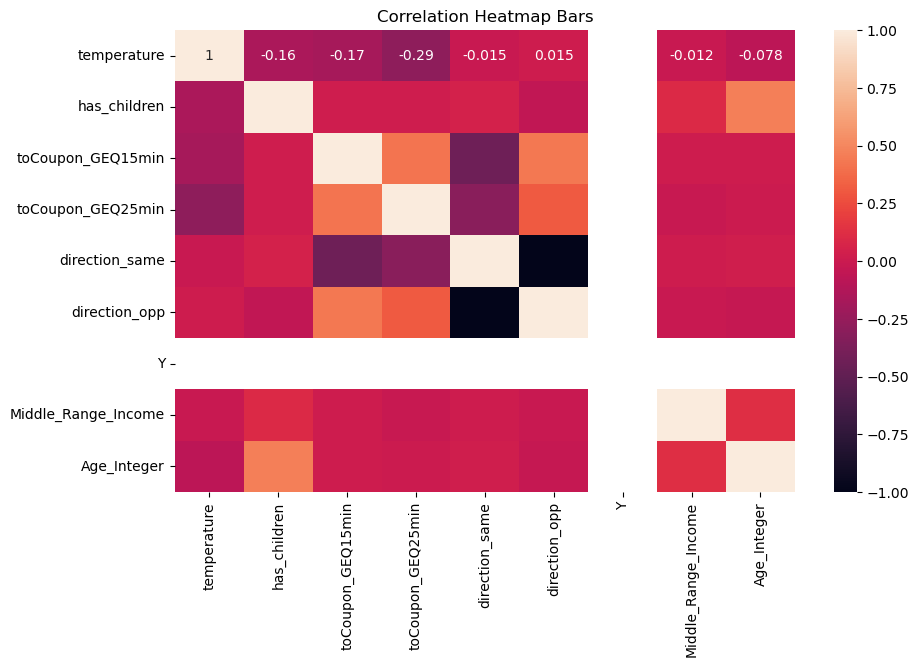

In [67]:
#Explore a correlation of numeric values for redeemers
print(DataBarCoupons.query('Y == 1').corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(DataBarCoupons.query('Y == 1').corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap Bars')

In [58]:
#Create coffee house coupon dataframe, check length for data quality
DataCoffeeCoupons = data.query('coupon == "Coffee House"')
len(DataCoffeeCoupons)

3996

                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000     -0.025171          -0.063717   
has_children           -0.025171      1.000000           0.099199   
toCoupon_GEQ15min      -0.063717      0.099199           1.000000   
toCoupon_GEQ25min      -0.134711      0.029340           0.251951   
direction_same         -0.051692     -0.028487          -0.265659   
direction_opp           0.051692      0.028487           0.265659   
Y                            NaN           NaN                NaN   
Middle_Range_Income     0.014345      0.091171           0.025175   
Age_Integer            -0.026875      0.421329           0.021295   

                     toCoupon_GEQ25min  direction_same  direction_opp   Y  \
temperature                  -0.134711       -0.051692       0.051692 NaN   
has_children                  0.029340       -0.028487       0.028487 NaN   
toCoupon_GEQ15min             0.251951       -0.265659       0.265659 NaN   
t

C:\Users\conta\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap Coffee')

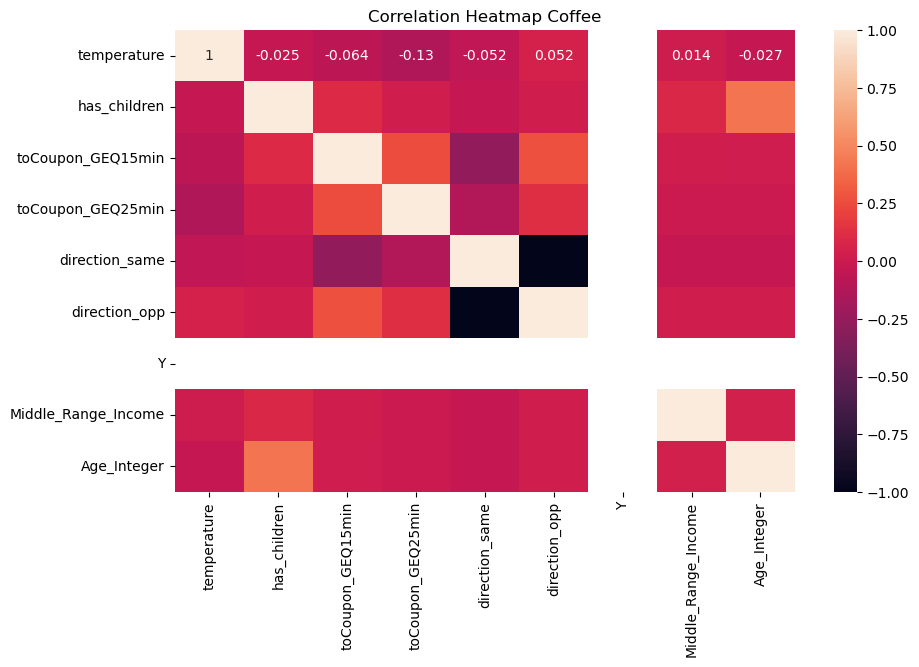

In [68]:
#Explore a correlation of numeric values for coffee house redeemers
print(DataCoffeeCoupons.query('Y == 1').corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(DataCoffeeCoupons.query('Y == 1').corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap Coffee')

In [59]:
#Create carry out coupon dataframe, check length for data quality
DataCarryOutCoupons = data.query('coupon == "Carry out & Take away"')
len(DataCarryOutCoupons)

2393

                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000      0.036335          -0.263879   
has_children            0.036335      1.000000           0.060084   
toCoupon_GEQ15min      -0.263879      0.060084           1.000000   
toCoupon_GEQ25min       0.146284     -0.105001           0.271644   
direction_same          0.250063     -0.038554          -0.312282   
direction_opp          -0.250063      0.038554           0.312282   
Y                            NaN           NaN                NaN   
Middle_Range_Income    -0.040025      0.068402           0.025657   
Age_Integer            -0.016569      0.444995           0.061721   

                     toCoupon_GEQ25min  direction_same  direction_opp   Y  \
temperature                   0.146284        0.250063      -0.250063 NaN   
has_children                 -0.105001       -0.038554       0.038554 NaN   
toCoupon_GEQ15min             0.271644       -0.312282       0.312282 NaN   
t

C:\Users\conta\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap Carryout')

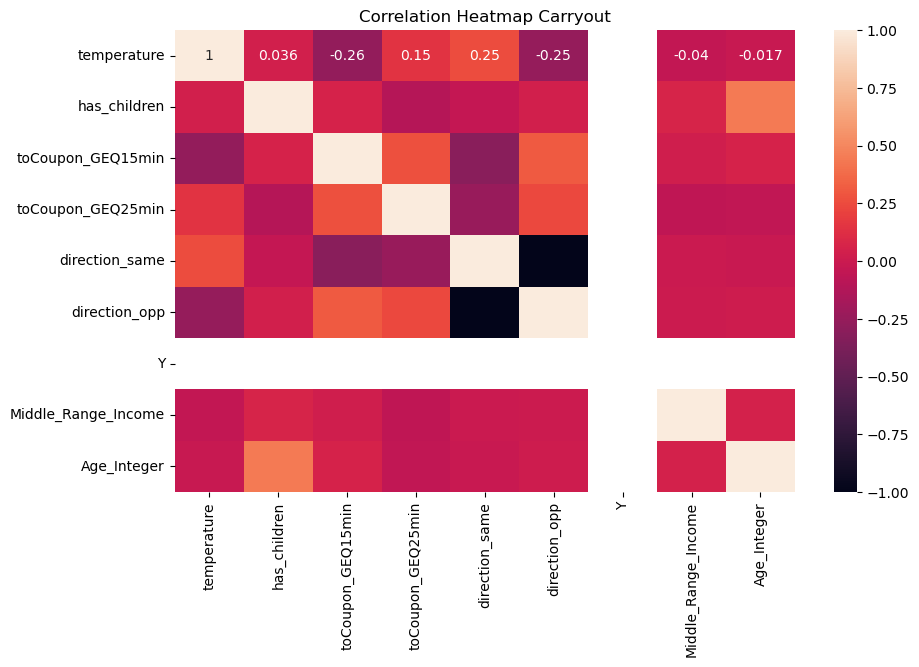

In [69]:
#Explore a correlation of numeric values for carry out
print(DataCarryOutCoupons.query('Y == 1').corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(DataCarryOutCoupons.query('Y == 1').corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap Carryout')

In [62]:
#Create fine dining coupon dataframe, check length for data quality
DataFineDiningCoupons = data.query('coupon == "Restaurant(20-50)"')
len(DataFineDiningCoupons)

1492

                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000     -0.010867          -0.030706   
has_children           -0.010867      1.000000           0.156476   
toCoupon_GEQ15min      -0.030706      0.156476           1.000000   
toCoupon_GEQ25min      -0.466891      0.049443           0.219184   
direction_same          0.046072      0.063511          -0.395894   
direction_opp          -0.046072     -0.063511           0.395894   
Y                            NaN           NaN                NaN   
Middle_Range_Income     0.050730      0.065805           0.028372   
Age_Integer            -0.036800      0.434820           0.029363   

                     toCoupon_GEQ25min  direction_same  direction_opp   Y  \
temperature                  -0.466891        0.046072      -0.046072 NaN   
has_children                  0.049443        0.063511      -0.063511 NaN   
toCoupon_GEQ15min             0.219184       -0.395894       0.395894 NaN   
t

C:\Users\conta\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap FineDining')

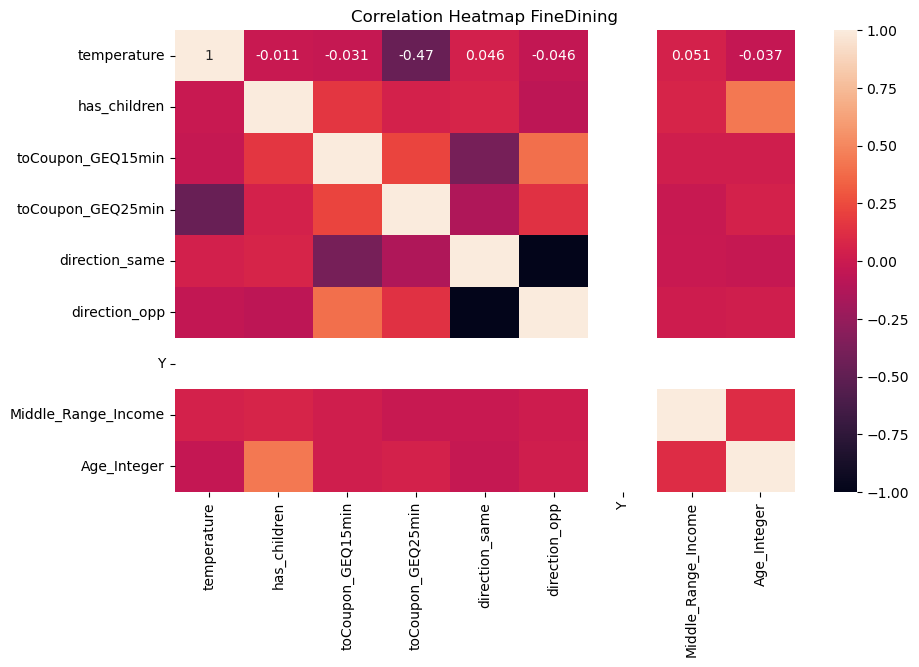

In [70]:
#Explore a correlation of numeric values for fine dining redeemers
print(DataFineDiningCoupons.query('Y == 1').corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(DataFineDiningCoupons.query('Y == 1').corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap FineDining')

In [63]:
#Create casual restaurant coupon dataframe (value less than 20), check length for data quality
DataCasualCoupons = data.query('coupon == "Restaurant(<20)"')
len(DataCasualCoupons)

2786

                     temperature  has_children  toCoupon_GEQ15min  \
temperature             1.000000      0.030587           0.042928   
has_children            0.030587      1.000000           0.009776   
toCoupon_GEQ15min       0.042928      0.009776           1.000000   
toCoupon_GEQ25min      -0.379702     -0.000312           0.278191   
direction_same          0.186183     -0.048588          -0.327369   
direction_opp          -0.186183      0.048588           0.327369   
Y                            NaN           NaN                NaN   
Middle_Range_Income    -0.025189      0.064138          -0.016094   
Age_Integer             0.004712      0.430565          -0.030721   

                     toCoupon_GEQ25min  direction_same  direction_opp   Y  \
temperature                  -0.379702        0.186183      -0.186183 NaN   
has_children                 -0.000312       -0.048588       0.048588 NaN   
toCoupon_GEQ15min             0.278191       -0.327369       0.327369 NaN   
t

C:\Users\conta\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Text(0.5, 1.0, 'Correlation Heatmap Casual Dining')

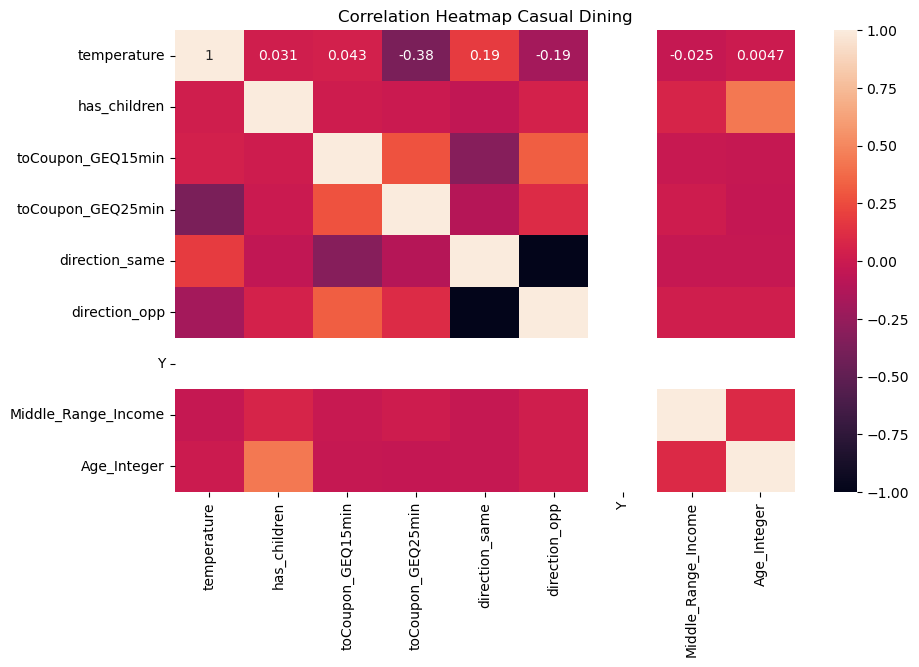

In [71]:
#Explore at correlation of numeric values
print(DataCasualCoupons.query('Y == 1').corr(numeric_only=True))
plt.figure(figsize=(10,6))
heatmap = sns.heatmap(DataCasualCoupons.query('Y == 1').corr(numeric_only=True), annot=True)
heatmap.set_title('Correlation Heatmap Casual Dining')

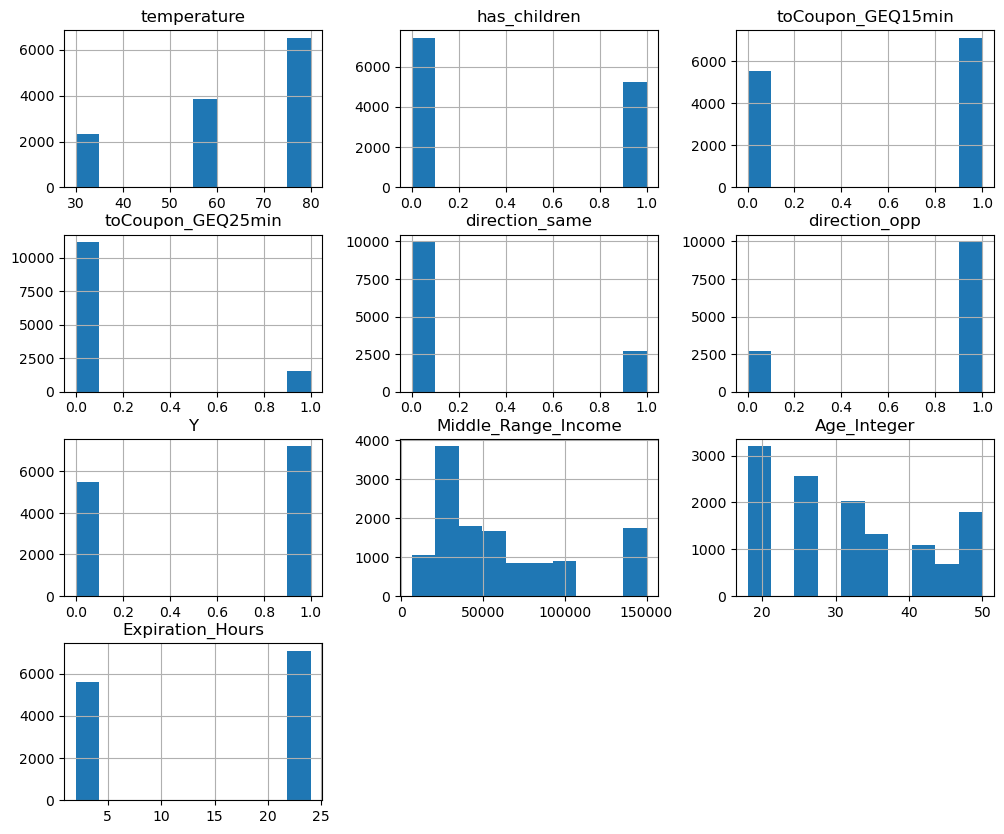

In [105]:
#Review data distrbutions for all
data.hist(figsize=(12,10));

In [99]:
#Review income distribution above
len(data.query('Y==1 & income == "$100000 or More"'))/len(data.query('income == "$100000 or More"'))

0.5783410138248848

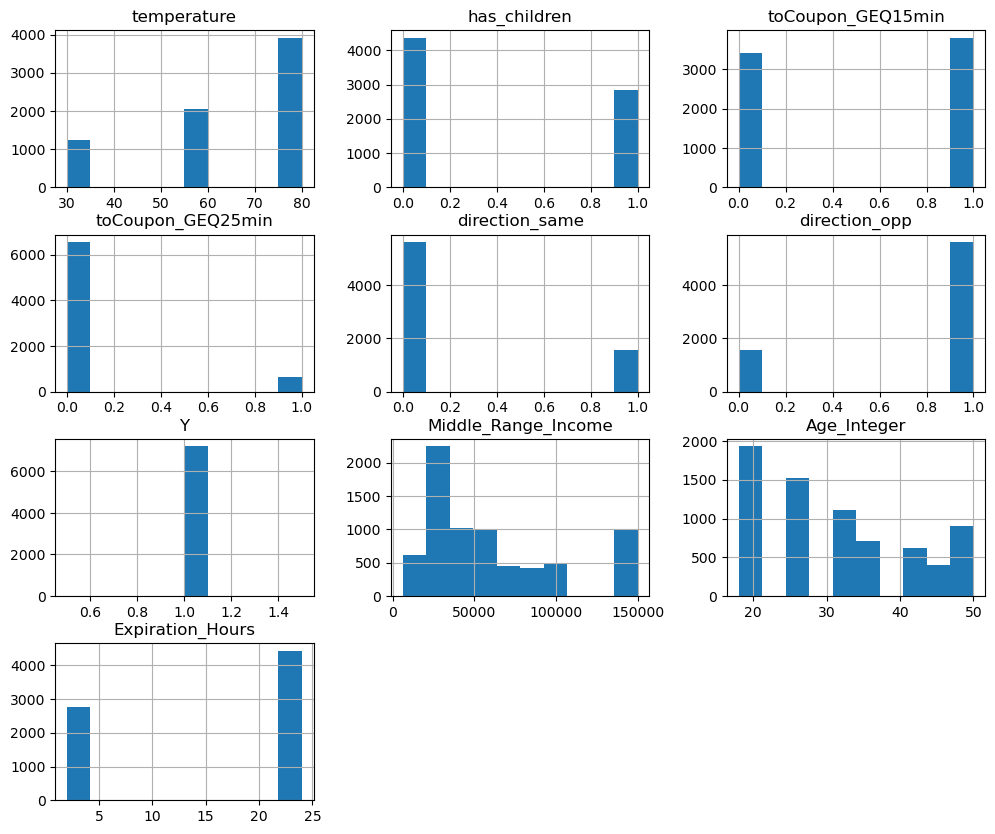

In [106]:
#Review data distrbutions for redeemers
data.query('Y == 1').hist(figsize=(12,10));

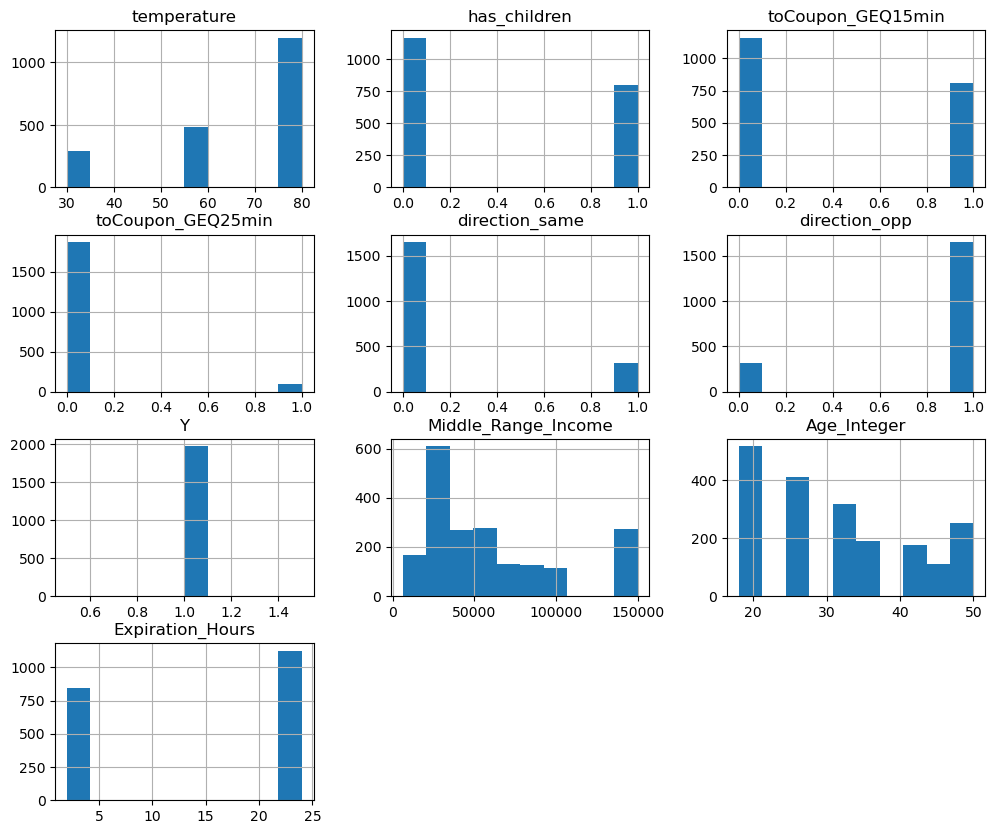

In [122]:
#Review data distrbutions for redeemers at casual restaurants
data.query('Y == 1 & coupon == "Restaurant(<20)"').hist(figsize=(12,10));

In [129]:
#Review the small amount of coupons redeemed at casul resturants with 25 miles
len(data.query('Y == 1 & coupon == "Restaurant(<20)" & toCoupon_GEQ25min == 1'))

101

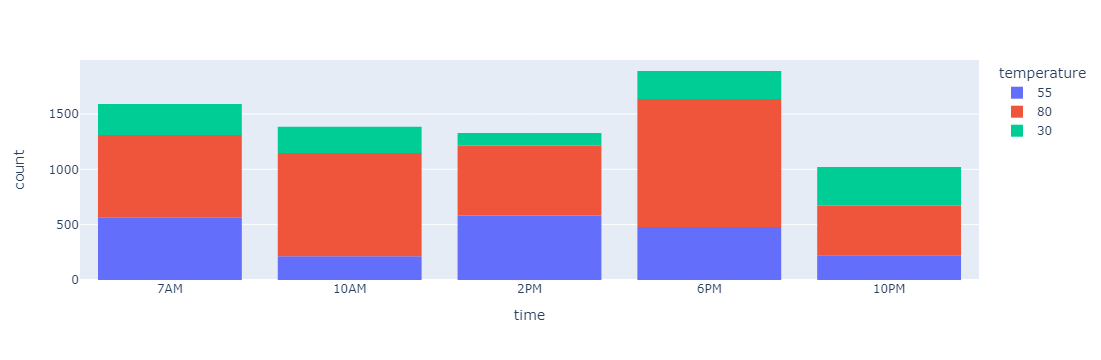

In [109]:
#Temperature and time review for all graphs
px.histogram(data.query('Y == 1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

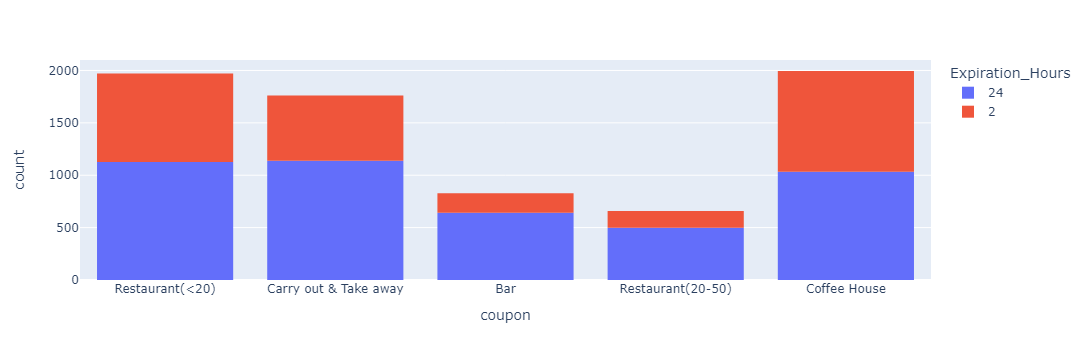

In [114]:
#Coupon expirations by coupn type for redeeemers
px.histogram(data.query('Y == 1'), x='coupon', color='Expiration_Hours')

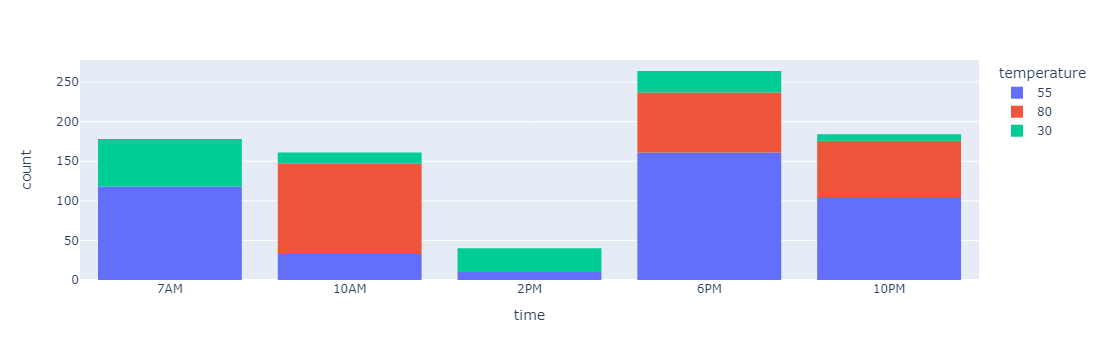

In [77]:
#Temperature and time review for bar coupon redeemers
px.histogram(DataBarCoupons.query('Y==1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

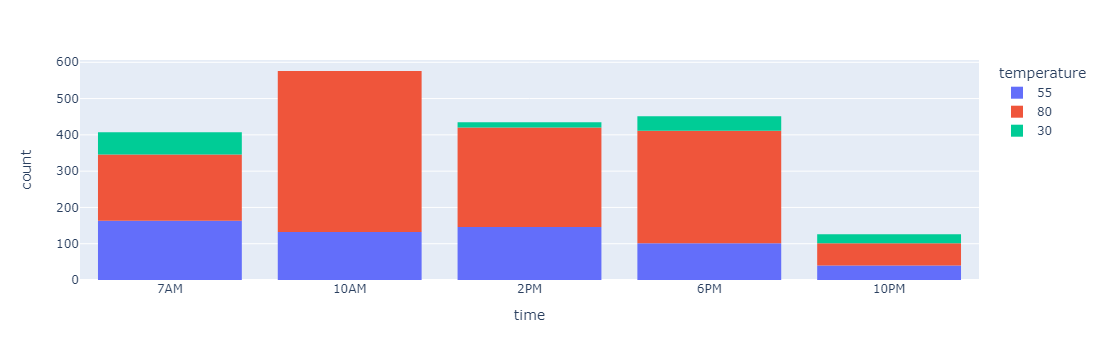

In [79]:
#Temperature and time review for coffee house coupon redeemers
px.histogram(DataCoffeeCoupons.query('Y==1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

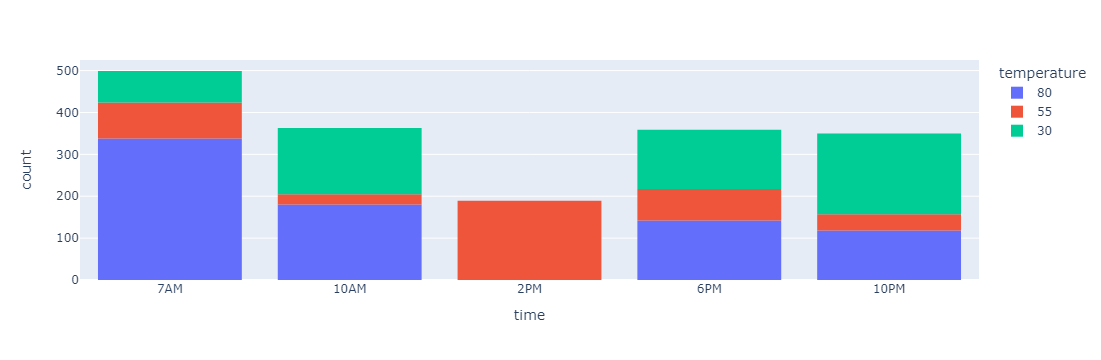

In [80]:
#Temperature and time review for carry out coupon redeemers
px.histogram(DataCarryOutCoupons.query('Y==1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

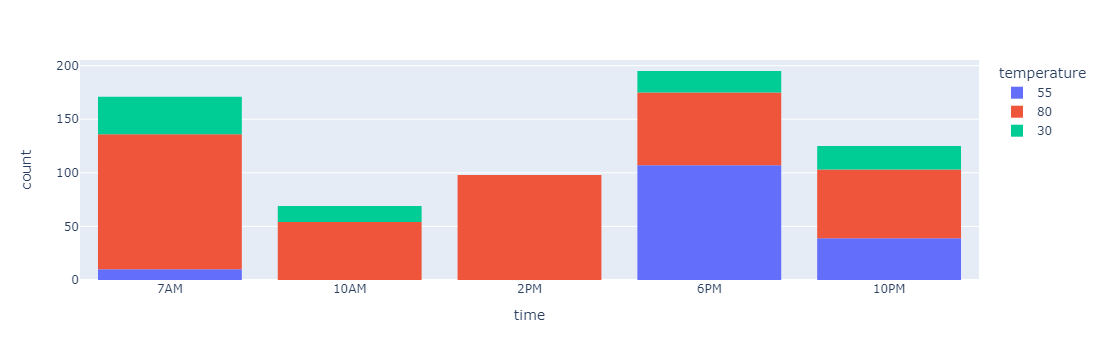

In [81]:
#Temperature and time review for fine dining coupon redeemers
px.histogram(DataFineDiningCoupons.query('Y==1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

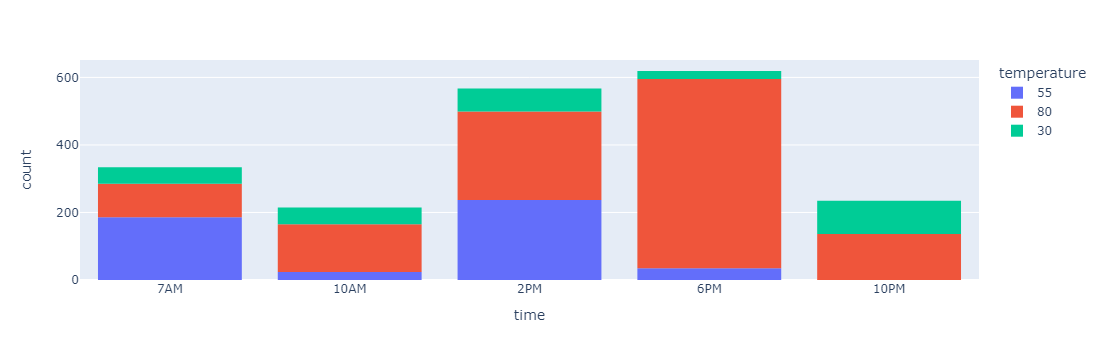

In [82]:
#Temperature and time review for casual coupons redeemers
px.histogram(DataCasualCoupons.query('Y==1'), x='time', category_orders=dict(time=["7AM", "10AM", "2PM", "6PM", "10PM"]), color='temperature')

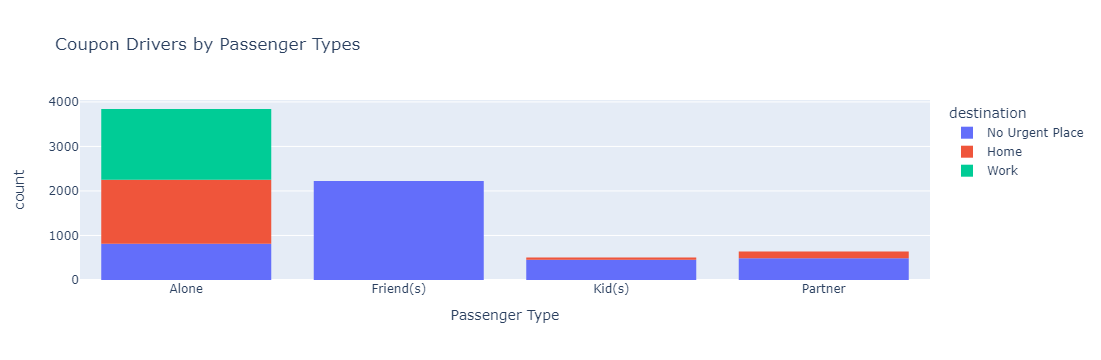

In [83]:
#Additionally when passengers were traveling with friends, kids or a partner, coupon use was strong when they were not in a rush

px.histogram(data.query('Y==1'), x='passanger', title='Coupon Drivers by Passenger Types', color='destination').update_layout(xaxis_title='Passenger Type')